<a href="https://colab.research.google.com/github/VMVoron/ITMO/blob/main/Prob_theory2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Пусть у нас есть распределение плотности случайной величины
$$    f_\xi(x) = \theta^2xe^{-\theta x} $$

Для каждого $\theta \in \{0.5, 2, 8\}$  аналитически  вычислить матожидание, дисперсию, матожидание квадрата.

### Матожидание

Пусть случайная величина $\xi$ имеет абсолютно непрерывное распределение с плотностью $f_{\xi}(x)$. Математическим ожиданием случайной величины $\xi$ называется число

$ \mathsf E \xi = \int\limits_{-\infty}^{+\infty} x f_{\xi}(x) dx $

при условии, что написанный интеграл сходится абсолютно (то есть если существует $\mathsf E|\xi|$). Иначе говорят, что математического ожидания не существует.

$ E_{\xi} = M(X) = \int_{-∞}^{∞}xf(x)dx = \int_{-\infty}^{+\infty} x\theta^2xe^{-\theta x} dx  $

$D_{\xi} = E({\xi}- E_{\xi})^{2} = E_{\xi}^{2} - (E_{\xi})^{2}$





$ E_{\xi} = \int_{0}^{+∞} x^{2}{\theta}^{2}e^{-{\theta x}} dx = |u = {\theta}^{2}x^{2}; dv = e^{-{\theta x}} dx; du = 2 {\theta}^{2}xdx; v = -\frac{1}{\theta}e^{-{\theta}x} | = uv- \int_{0}^{+∞} vdu = -{\theta}^{2}x^{2} \frac{1}{{\theta}} e^{-{\theta}{x}}- \int_{0}^{+∞} -\frac{1}{{\theta}} e^{-{\theta}{x}}2{\theta}^{2}xdx = -{\theta}x^{2}e^{-{\theta}x} + 2 {\theta} \int_{0}^{+∞} xe^{-{\theta}x}dx  = |u = x; du = dx; dv = e^{-{\theta}x}dx; v = \frac{-1}{{\theta}}e^{-{\theta}x}|= -{\theta}x^{2}e^{-{\theta}x} + 2 {\theta} (-x \frac{1}{{\theta}}e^{-{\theta}x}- \int_{0}^{+∞} - \frac{1}{\theta}e^{- \theta x} dx =-{\theta}x^{2}e^{-{\theta}x} + 2 {\theta} (-x \frac{1}{{\theta}}e^{-{\theta}x} - \frac{1}{\theta^{2}}e^{-\theta x})  \Bigg|_{0}^{+∞} = -{\theta}x^{2}e^{-{\theta}x} + 2 {\theta} (-x \frac{1}{{\theta}}e^{-{\theta}x} - (0- \frac{1}{\theta^{2}})) =  \frac{2}{\theta}   $


$ E_{\xi}^2 = \frac{4}{\theta^{2}} $

$ E_{\xi^2} =  \theta ^2 \int_{0}^{+∞} x^3 e^{- \theta x}dx = \theta^2 [(- \frac{1}{\theta}e^{- \theta x}x^3) + \int_{0}^{+∞} \frac{1}{\theta}e^{- \theta x} 3x^2 dx]= \theta^2 (- \frac{1}{\theta}e^{-\theta x}x^3 + \frac{3}{\theta}\int_{0}^{+∞} x^2 e^{- \theta x} dx) = \theta^2  ( - \frac{1}{\theta}e^{- \theta x}x^3+ \frac{3}{\theta}(x^2e^{-\theta x}- 2\int_{0}^{+∞}x e^{-\theta x}dx) ) = \theta^2 [- \frac{1}{\theta}e^{- \theta x}x^3 + \frac{3}{\theta}(x^2e^{- \theta x}- 2(- \frac{1}{\theta}e^{-\theta x}) + \frac{1}{\theta}\int_{0}^{+∞}e^{- \theta x}dx ]  = \theta ^2 [\frac{-1}{\theta}e^{\theta x}x^3+ \frac{3}{\theta}x^2e^{-\theta x}+ \frac{6}{\theta^2}e^{-\theta x}x- \frac{6 e^{-\theta x}}{\theta^3}] \Bigg|_{0}^{+∞}= - \theta e^{-\theta x}x^3 + 3x^2 e^{-\theta x }\theta + \frac{6}{\theta^2}{e^{-\theta x}}\Bigg|_{0}^{+∞} =
0 - (0+0- \frac{6}{\theta^2}) = \frac{6}{\theta^2} $

$D_{\xi}  =\frac{6}{\theta^2} -  \frac{4}{\theta^{2}} = \frac{2}{\theta^2}$

In [ ]:
def d(theta):
  d = 2/float(theta)
  return d

In [ ]:
d(0.5)

4.0

In [ ]:
d(2)

1.0

In [ ]:
d(8)

0.25

### Выборки и оценка

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
k_list = [2**k for k in range(4, 16)]

In [ ]:
np.sqrt(0.5)

0.7071067811865476

Сгенерируем выборку

In [ ]:
class gen(stats.rv_continuous):
    def _pdf(self, x):
        return theta**2 * x * np.exp(-theta * x)

In [ ]:
theta = 0.5

c = gen(a=0, b=np.inf, name='cubic')

sample = c.rvs(size=160)
print('theta = ', theta)
print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среднее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

theta =  0.5
Первые 10 значений выборки:
 [1.82742248 7.90126557 2.02096165 2.33445256 0.39449237 2.33437359
 0.44735974 4.86926245 4.47422582 4.48855875]
Выборочное среднее: 3.509
Выборочная дисперсия: 7.155


In [ ]:
res_05 = []
for k in k_list:
    tmp = [k, c.rvs(size=k).mean()]
    res_05.append(tmp)
res_05
nump_res_05 = np.array(res_05)

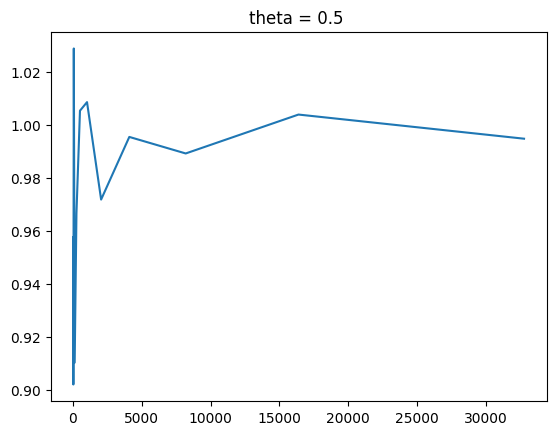

In [ ]:
plt.plot(nump_res_05[:,0], nump_res_05[:,1])
plt.title("theta = 0.5 ")
plt.show()

In [ ]:
theta = 2

c = gen(a=0, b=np.inf, name='cubic')

sample = c.rvs(size=160)
print('theta = ', theta)
print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среднее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

theta =  2
Первые 10 значений выборки:
 [1.0683448  0.31421101 0.42645172 0.51489843 0.8638058  1.00064873
 0.33000312 2.25328472 0.3577771  1.21660265]
Выборочное среднее: 1.044
Выборочная дисперсия: 0.564


In [ ]:
res_2 = []
for k in k_list:
    tmp = [k, c.rvs(size=k).mean()]
    res_2.append(tmp)
res_2
nump_res_2 = np.array(res_2)

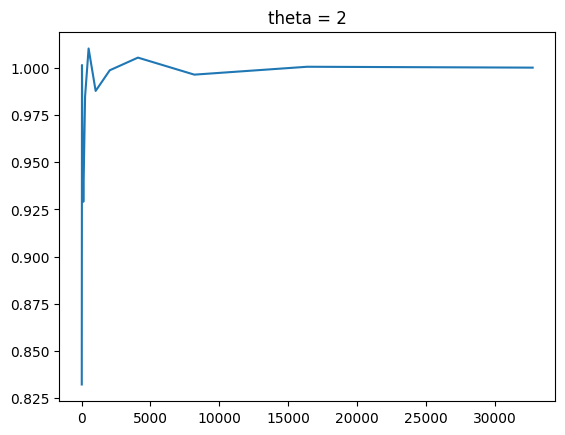

In [ ]:
plt.plot(nump_res_2[:,0], nump_res_2[:,1])
plt.title("theta = 2")
plt.show()

In [ ]:
theta = 8

c = gen(a=0, b=np.inf, name='cubic')

sample = c.rvs(size=160)
print('theta = ', theta)
print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среднее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

theta =  8
Первые 10 значений выборки:
 [0.46547314 0.37354145 0.44634663 0.08580859 0.4066402  0.66103375
 0.19800484 0.05568714 0.25503595 0.20654129]
Выборочное среднее: 0.252
Выборочная дисперсия: 0.032


In [ ]:
res_8 = []
for k in k_list:
    tmp = [k, c.rvs(size=k).mean()]
    res_8.append(tmp)
res_8
nump_res_8 = np.array(res_8)

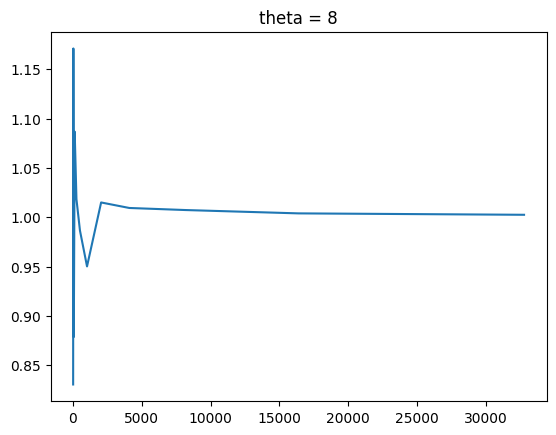

In [ ]:
plt.plot(nump_res_8[:,0], nump_res_8[:,1])
plt.title("theta = 8")
plt.show()

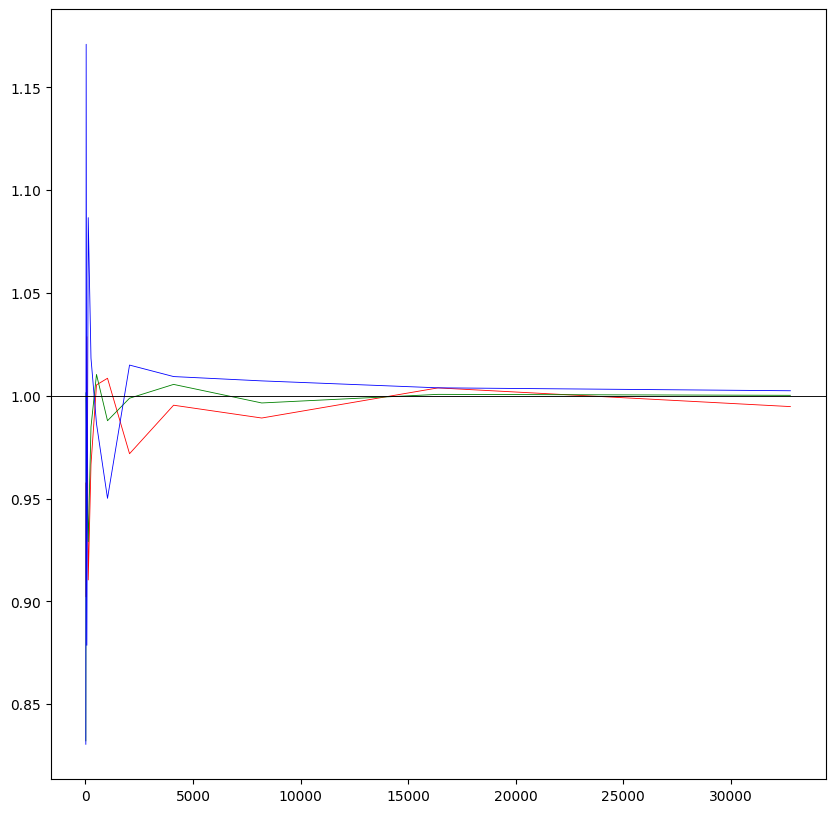

In [ ]:
plt.figure(figsize = (10, 10))

plt.plot(nump_res_05[:,0], nump_res_05[:,1], color = 'red', linewidth=0.6)
plt.plot(nump_res_2[:,0], nump_res_2[:,1], color = 'green', linewidth=0.6)
plt.plot(nump_res_8[:,0], nump_res_8[:,1], color = 'blue', linewidth=0.6)

plt.axhline(1, color="black",  linewidth=0.4)
plt.axhline(1, color="black",  linewidth=0.4)
plt.axhline(1, color="black",  linewidth=0.4)



plt.show()

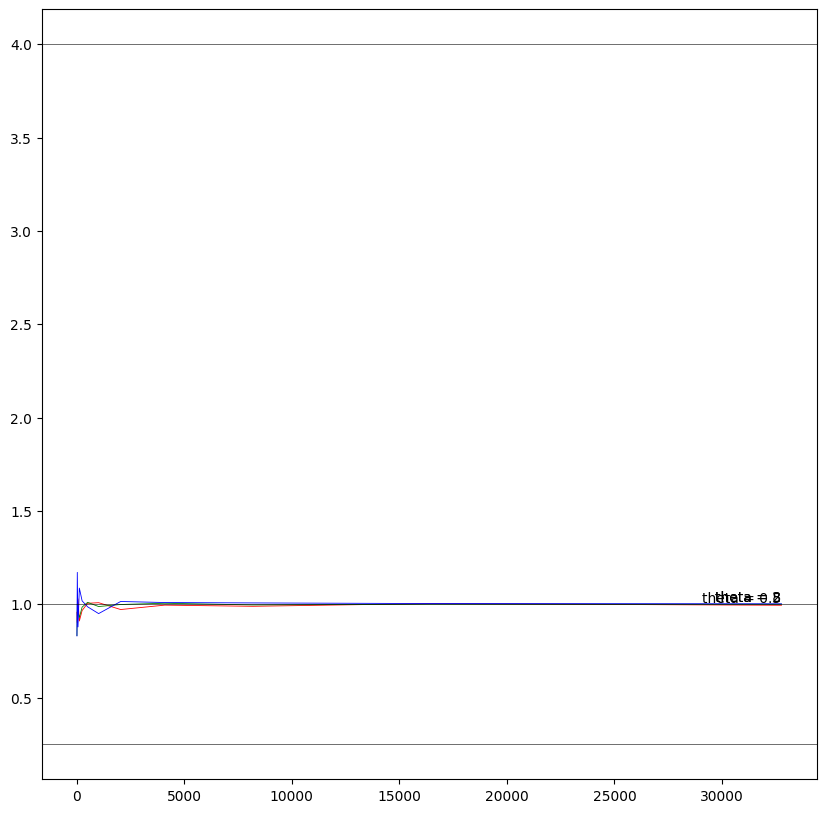

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

plt.plot(nump_res_05[:,0], nump_res_05[:,1], color='red', linewidth=0.6)
plt.plot(nump_res_2[:,0], nump_res_2[:,1], color='green', linewidth=0.6)
plt.plot(nump_res_8[:,0], nump_res_8[:,1], color='blue', linewidth=0.6)

plt.axhline(4, color="black", linewidth=0.4)
plt.axhline(1, color="black", linewidth=0.4)
plt.axhline(0.25, color="black", linewidth=0.4)

plt.text(nump_res_05[-1,0], nump_res_05[-1,1], "theta = 0.5", ha='right', va='bottom')
plt.text(nump_res_2[-1,0], nump_res_2[-1,1], "theta = 2", ha='right', va='bottom')
plt.text(nump_res_8[-1,0], nump_res_8[-1,1], "theta = 8", ha='right', va='bottom')

plt.show()

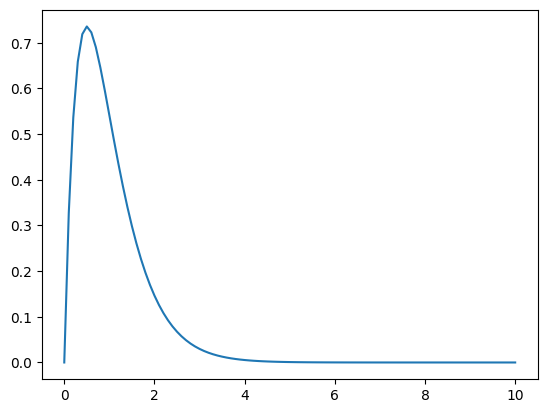

In [ ]:
x = np.linspace(0, 10, 101)
y = np.array([4 * t * np.exp(-2 * t) for t in x])
plt.plot(x, y)